In [1]:
import tensorflow as tf

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu="")
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices("TPU"))

strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.44.19.186:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.44.19.186:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU')]
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [2]:
import pandas as pd

# Import data from csv
csv_data = pd.read_csv("drive/MyDrive/tripadvisor_hotel_reviews.csv")

# Extract reviews and ratings
extracted_reviews = csv_data["Review"]
extracted_ratings = csv_data["Rating"]

In [3]:
import re

# Preprocess sentences
def preprocess(review):
  # creating a space between a word and the punctuation following it
  # eg: "he is a boy." => "he is a boy ."
  # Reference:- https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping-punctuation
  review = re.sub(r"([?.!,¿])", r" \1 ", review)
  review = re.sub(r'[" "]+', " ", review)

  # Remove spaces potentially added by regex moving punctuation
  review = review.strip()

  # Add a start and end token to the sentence to improve predictions
  # so the model knows when to start and stop predicting
  # Reference: https://www.tensorflow.org/tutorials/text/nmt_with_attention#write_the_encoder_and_decoder_model
  review = "<start> " + review + " <end>"

  # Return preprocessed sentence
  return review

# Use list comprehension to preprocess all of the reviews
extracted_reviews = [preprocess(review) for review in extracted_reviews]
print(extracted_reviews[0])

<start> nice hotel expensive parking got good deal stay hotel anniversary , arrived late evening took advice previous reviews did valet parking , check quick easy , little disappointed non-existent view room room clean nice size , bed comfortable woke stiff neck high pillows , not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway , maybe just noisy neighbors , aveda bath products nice , did not goldfish stay nice touch taken advantage staying longer , location great walking distance shopping , overall nice experience having pay 40 parking night ,<end>


In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

# Tokenize sentence, return the tokenized sequences and the tokenizer
def tokenize(sequences):
  tokenizer = Tokenizer(filters="")
  tokenizer.fit_on_texts(sequences)
  tensor = tokenizer.texts_to_sequences(sequences)
  tensor = pad_sequences(tensor, padding="post")
  return tensor, tokenizer

reviews, reviews_tokenizer = tokenize(extracted_reviews)

ratings = extracted_ratings

In [5]:
import numpy as np
# Import glove embeddings
embeddings_index = {}
embeddingFile = open("drive/MyDrive/glove.6B.300d.txt", encoding="utf-8")
for line in embeddingFile:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype="float32")
    embeddings_index[word] = coefs
embeddingFile.close()
print("Number of words in glove embeddings = ", len(embeddings_index))

embedding_matrix = np.zeros((len(reviews_tokenizer.word_index) + 1, 300))


for word, i in reviews_tokenizer.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector



Number of words in glove embeddings =  400000


In [10]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers.schedules import ExponentialDecay

print(reviews.shape)
print(ratings.shape)

lr_schedule = ExponentialDecay(
    1e-3,
    decay_steps = 1e4,
    decay_rate = 0.8,
    staircase=True
)

with strategy.scope():
  network = Sequential()
  network.add(Embedding(len(reviews_tokenizer.word_index) + 1, 300, input_length=reviews.shape[1], weights=[embedding_matrix]))
  network.add(Bidirectional(LSTM(150, return_sequences=True)))
  network.add(Bidirectional(LSTM(150, return_sequences =True)))
  network.add(GlobalMaxPool1D())
  network.add(Dropout(0.1))
  network.add(Dense(50, activation = "relu"))
  network.add(Dropout(0.1))
  network.add(Dense(6, activation="softmax"))

  network.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr_schedule), metrics=["accuracy"])
  
  history = network.fit(reviews, ratings, batch_size=1024, epochs=20, validation_split=0.2)



(20491, 2275)
(20491,)
Epoch 1/20
17/17 [==============================] - 60s 2s/step - loss: 1.5265 - accuracy: 0.3476 - val_loss: 1.3702 - val_accuracy: 0.4899
Epoch 2/20
17/17 [==============================] - 13s 744ms/step - loss: 1.3629 - accuracy: 0.4268 - val_loss: 1.0460 - val_accuracy: 0.5384
Epoch 3/20
17/17 [==============================] - 13s 745ms/step - loss: 1.0844 - accuracy: 0.5257 - val_loss: 0.9914 - val_accuracy: 0.5784
Epoch 4/20
17/17 [==============================] - 13s 746ms/step - loss: 0.9906 - accuracy: 0.5760 - val_loss: 0.9546 - val_accuracy: 0.5760
Epoch 5/20
17/17 [==============================] - 13s 745ms/step - loss: 0.9368 - accuracy: 0.5871 - val_loss: 0.8176 - val_accuracy: 0.6428
Epoch 6/20
17/17 [==============================] - 13s 746ms/step - loss: 0.8161 - accuracy: 0.6459 - val_loss: 0.8190 - val_accuracy: 0.6387
Epoch 7/20
17/17 [==============================] - 13s 745ms/step - loss: 0.7759 - accuracy: 0.6650 - val_loss: 0.8259 - 

In [21]:
with strategy.scope():
  network = Sequential()
  network.add(Embedding(len(reviews_tokenizer.word_index) + 1, 300, input_length=reviews.shape[1], weights=[embedding_matrix]))
  network.add(Bidirectional(GRU(50, return_sequences=True)))
  network.add(Bidirectional(GRU(50, return_sequences =True)))
  network.add(GlobalMaxPool1D())
  network.add(Dropout(0.1))
  network.add(Dense(50, activation = "relu"))
  network.add(Dropout(0.1))
  network.add(Dense(6, activation="softmax"))

  network.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr_schedule), metrics=["accuracy"])
  
  gru_history = network.fit(reviews, ratings, batch_size=1024, epochs=20, validation_split=0.2)

Epoch 1/20
17/17 [==============================] - 52s 2s/step - loss: 1.5629 - accuracy: 0.3545 - val_loss: 1.2823 - val_accuracy: 0.4899
Epoch 2/20
17/17 [==============================] - 7s 432ms/step - loss: 1.3604 - accuracy: 0.4256 - val_loss: 1.1831 - val_accuracy: 0.5165
Epoch 3/20
17/17 [==============================] - 7s 432ms/step - loss: 1.2158 - accuracy: 0.4714 - val_loss: 1.0641 - val_accuracy: 0.5392
Epoch 4/20
17/17 [==============================] - 7s 434ms/step - loss: 1.0473 - accuracy: 0.5456 - val_loss: 0.9976 - val_accuracy: 0.5435
Epoch 5/20
17/17 [==============================] - 7s 434ms/step - loss: 0.9645 - accuracy: 0.5729 - val_loss: 0.8739 - val_accuracy: 0.6087
Epoch 6/20
17/17 [==============================] - 7s 432ms/step - loss: 0.8485 - accuracy: 0.6263 - val_loss: 0.8622 - val_accuracy: 0.6119
Epoch 7/20
17/17 [==============================] - 7s 433ms/step - loss: 0.7891 - accuracy: 0.6520 - val_loss: 0.8943 - val_accuracy: 0.6194
Epoch 8/

In [24]:
with strategy.scope():
  network = Sequential()
  network.add(Embedding(len(reviews_tokenizer.word_index) + 1, 300, input_length=reviews.shape[1], weights=[embedding_matrix]))
  network.add(GRU(50, return_sequences=True))
  network.add(GRU(50, return_sequences =True))
  network.add(GlobalMaxPool1D())
  network.add(Dropout(0.1))
  network.add(Dense(50, activation = "relu"))
  network.add(Dropout(0.1))
  network.add(Dense(6, activation="softmax"))

  network.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr_schedule), metrics=["accuracy"])
  
  s_gru_history = network.fit(reviews, ratings, batch_size=1024, epochs=20, validation_split=0.2)

Epoch 1/20
17/17 [==============================] - 45s 2s/step - loss: 1.5886 - accuracy: 0.3430 - val_loss: 1.3078 - val_accuracy: 0.4899
Epoch 2/20
17/17 [==============================] - 4s 259ms/step - loss: 1.4094 - accuracy: 0.4025 - val_loss: 1.2675 - val_accuracy: 0.4899
Epoch 3/20
17/17 [==============================] - 4s 258ms/step - loss: 1.3444 - accuracy: 0.4312 - val_loss: 1.1800 - val_accuracy: 0.5011
Epoch 4/20
17/17 [==============================] - 4s 257ms/step - loss: 1.2186 - accuracy: 0.4689 - val_loss: 1.0296 - val_accuracy: 0.5601
Epoch 5/20
17/17 [==============================] - 4s 258ms/step - loss: 1.0556 - accuracy: 0.5412 - val_loss: 0.9332 - val_accuracy: 0.5904
Epoch 6/20
17/17 [==============================] - 4s 257ms/step - loss: 0.9477 - accuracy: 0.5778 - val_loss: 0.8826 - val_accuracy: 0.6111
Epoch 7/20
17/17 [==============================] - 4s 258ms/step - loss: 0.8923 - accuracy: 0.5984 - val_loss: 0.8655 - val_accuracy: 0.6248
Epoch 8/

In [27]:
with strategy.scope():
  network = Sequential()
  network.add(Embedding(len(reviews_tokenizer.word_index) + 1, 300, input_length=reviews.shape[1], weights=[embedding_matrix]))
  network.add(LSTM(50, return_sequences=True))
  network.add(LSTM(50, return_sequences =True))
  network.add(GlobalMaxPool1D())
  network.add(Dropout(0.1))
  network.add(Dense(50, activation = "relu"))
  network.add(Dropout(0.1))
  network.add(Dense(6, activation="softmax"))

  network.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr_schedule), metrics=["accuracy"])
  
  s_history = network.fit(reviews, ratings, batch_size=1024, epochs=20, validation_split=0.2)

Epoch 1/20
17/17 [==============================] - 45s 1s/step - loss: 1.6956 - accuracy: 0.3067 - val_loss: 1.3434 - val_accuracy: 0.4899
Epoch 2/20
17/17 [==============================] - 4s 255ms/step - loss: 1.4312 - accuracy: 0.4036 - val_loss: 1.3061 - val_accuracy: 0.4899
Epoch 3/20
17/17 [==============================] - 4s 255ms/step - loss: 1.4098 - accuracy: 0.4072 - val_loss: 1.2804 - val_accuracy: 0.4899
Epoch 4/20
17/17 [==============================] - 4s 255ms/step - loss: 1.3459 - accuracy: 0.4324 - val_loss: 1.1479 - val_accuracy: 0.5104
Epoch 5/20
17/17 [==============================] - 4s 254ms/step - loss: 1.1822 - accuracy: 0.4783 - val_loss: 1.1078 - val_accuracy: 0.5299
Epoch 6/20
17/17 [==============================] - 4s 254ms/step - loss: 1.0745 - accuracy: 0.5365 - val_loss: 0.9440 - val_accuracy: 0.5867
Epoch 7/20
17/17 [==============================] - 4s 254ms/step - loss: 0.9585 - accuracy: 0.5836 - val_loss: 0.8737 - val_accuracy: 0.6165
Epoch 8/

{'loss': [1.4396086931228638, 1.2878360748291016, 1.0548033714294434, 0.9640362858772278, 0.8972689509391785, 0.8039544224739075, 0.7635145783424377, 0.7463212013244629, 0.7281206846237183, 0.6322862505912781, 0.6545636057853699, 0.5432326793670654, 0.5033406019210815, 0.4431152045726776, 0.4104521572589874, 0.3559178411960602, 0.308108389377594, 0.23659104108810425, 0.29005712270736694, 0.20690158009529114], 'accuracy': [0.3972669541835785, 0.4410688281059265, 0.5389214158058167, 0.5835773348808289, 0.6057223081588745, 0.6514763236045837, 0.674475371837616, 0.6765495538711548, 0.6884455680847168, 0.739080011844635, 0.7258418798446655, 0.7865422368049622, 0.8045998215675354, 0.8355295062065125, 0.8485846519470215, 0.8742679357528687, 0.8925085663795471, 0.9262444972991943, 0.8976330161094666, 0.9333211183547974], 'val_loss': [1.3702412843704224, 1.0460039377212524, 0.9913711547851562, 0.9546148777008057, 0.8175761103630066, 0.8190311789512634, 0.8259497880935669, 0.8598859310150146, 0.

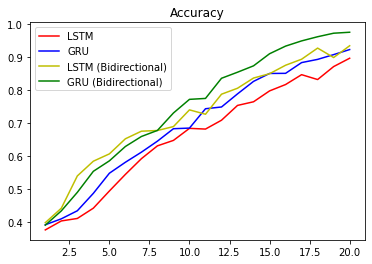

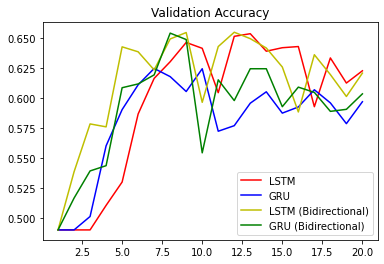

In [28]:
print(history.history)
epochs = range(1, len(history.history["accuracy"]) + 1)

import matplotlib.pyplot as plt

print(history.history.keys())

plt.title("Accuracy")
plt.plot(epochs, s_history.history["accuracy"], "r", label="LSTM")
plt.plot(epochs, s_gru_history.history["accuracy"], "b", label="GRU")
plt.plot(epochs, history.history["accuracy"], "y", label="LSTM (Bidirectional)")
plt.plot(epochs, gru_history.history["accuracy"], "g", label="GRU (Bidirectional)")
plt.legend()
plt.show()

plt.title("Validation Accuracy")
plt.plot(epochs, s_history.history["val_accuracy"], "r", label="LSTM")
plt.plot(epochs, s_gru_history.history["val_accuracy"], "b", label="GRU")
plt.plot(epochs, history.history["val_accuracy"], "y", label="LSTM (Bidirectional)")
plt.plot(epochs, gru_history.history["val_accuracy"], "g", label="GRU (Bidirectional)")
plt.legend()
plt.show()